In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold,GridSearchCV

In [2]:
df = pd.read_csv("/kaggle/input/movie-predict/data/data_unnoise.csv")
df.dtypes

budget                    int64
genres                    int64
homepage                  int64
popularity              float64
production_companies      int64
production_countries      int64
runtime                 float64
spoken_languages          int64
vote_average            float64
vote_count                int64
lang_english              int64
year                      int64
holiday                   int64
revenue                   int64
dtype: object

In [3]:
df['budget'] = df['budget'] / 1e+6
df['revenue'] = df['revenue'] / 1e+6
df.describe()

,budget,genres,homepage,popularity,production_companies,production_countries,runtime,spoken_languages,vote_average,vote_count,lang_english,year,holiday,revenue
count,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000
mean,30.866970,2.602531,0.355043,9.710683,2.938035,1.360811,109.774624,1.479903,6.271902,722.476926,0.891701,1999.743952,0.509118,88.200895
std,39.674773,1.126224,0.478571,13.563602,2.188934,0.791189,21.990667,0.920569,0.927915,1218.011351,0.310787,15.923695,0.499963,154.152374
min,0.000001,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1915.000000,0.000000,0.000001
25%,5.000000,2.000000,0.000000,5.432929,1.000000,1.000000,95.000000,1.000000,5.700000,77.000000,1.000000,1994.000000,0.000000,7.000565
50%,17.000000,3.000000,0.000000,8.380698,2.000000,1.000000,106.000000,1.000000,6.300000,276.000000,1.000000,2004.000000,1.000000,29.863699
75%,40.000000,3.000000,1.000000,11.696451,4.000000,2.000000,120.000000,2.000000,6.900000,795.000000,1.000000,2011.000000,1.000000,99.025405
max,380.000000,8.000000,1.000000,547.488298,26.000000,12.000000,338.000000,9.000000,9.100000,14075.000000,1.000000,2017.000000,1.000000,1405.403694


In [4]:
X, y = df.drop('revenue', axis=1), df['revenue']
idx = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, idx, test_size=0.2, random_state=20)

In [5]:


# Khởi tạo phân chia tập train/test cho mô hình. Đánh dấu các giá trị thuộc tập train là -1 và tập test là 0
split_index = [-1 if i in idx_train else 0 for i in idx]
ps = PredefinedSplit(test_fold=split_index)

# Khởi tạo pipeline gồm 2 bước, 'scaler' để chuẩn hoá đầu vào và 'model' là bước huấn luyện
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Ridge())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(1, 1000,1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )


search.fit(X, y)
print(search.best_estimator_)
print('Best core: ', np.sqrt(np.abs(search.best_score_)))

Fitting 1 folds for each of 999 candidates, totalling 999 fits
[CV 1/1] END ................model__alpha=1;, score=-6396.677 total time=   0.0s
[CV 1/1] END ................model__alpha=2;, score=-6396.664 total time=   0.0s
[CV 1/1] END ................model__alpha=3;, score=-6396.652 total time=   0.0s
[CV 1/1] END ................model__alpha=4;, score=-6396.641 total time=   0.0s
[CV 1/1] END ................model__alpha=5;, score=-6396.631 total time=   0.0s
[CV 1/1] END ................model__alpha=6;, score=-6396.623 total time=   0.0s
[CV 1/1] END ................model__alpha=7;, score=-6396.615 total time=   0.0s
[CV 1/1] END ................model__alpha=8;, score=-6396.608 total time=   0.0s
[CV 1/1] END ................model__alpha=9;, score=-6396.602 total time=   0.0s
[CV 1/1] END ...............model__alpha=10;, score=-6396.598 total time=   0.0s
[CV 1/1] END ...............model__alpha=11;, score=-6396.594 total time=   0.0s
[CV 1/1] END ...............model__alpha=12;, 

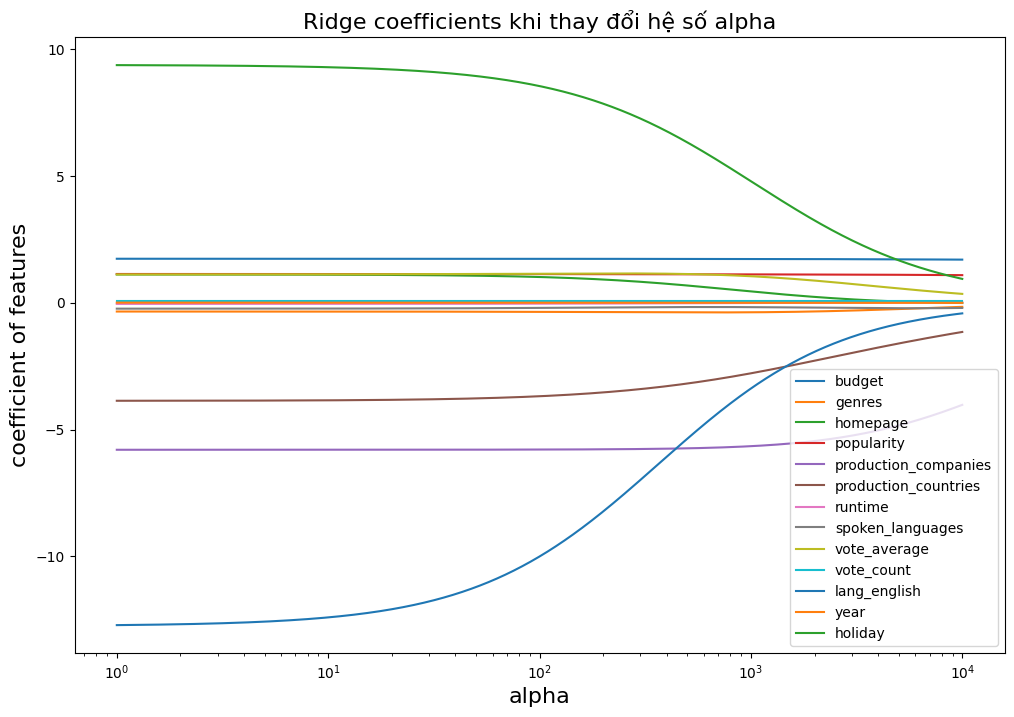

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Thay đổi alphas từ 1 --> 1000
n_alphas = 1000
alphas = np.logspace(0, 4, n_alphas)
coefs = []

# Huấn luyện model khi alpha thay đổi.
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Hiển thị kết quả mô hình cho các hệ số alpha
plt.figure(figsize= (12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(X.columns)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()

In [7]:
rr = Ridge(alpha= 1)
rr.fit(X_train, y_train)
print(rr.coef_)

pred_test_rr= rr.predict(X_test)

print("\n")
print(f'Sai số MAE: {mean_absolute_error(y_test, pred_test_rr) } triệu đô')

test_score_ridge = rr.score(X_test, y_test)
print("The test score for ridge model is {}".format(test_score_ridge))

[  1.76364072  -0.9514754    5.09008252   1.14762802  -5.13062954
  -3.80129417  -0.07435737  -0.4476153   -0.55069086   0.06142763
 -18.1587289   -0.42284177   8.59901918]


Sai số MAE: 44.06043099880921 triệu đô
The test score for ridge model is 0.7122112329871508


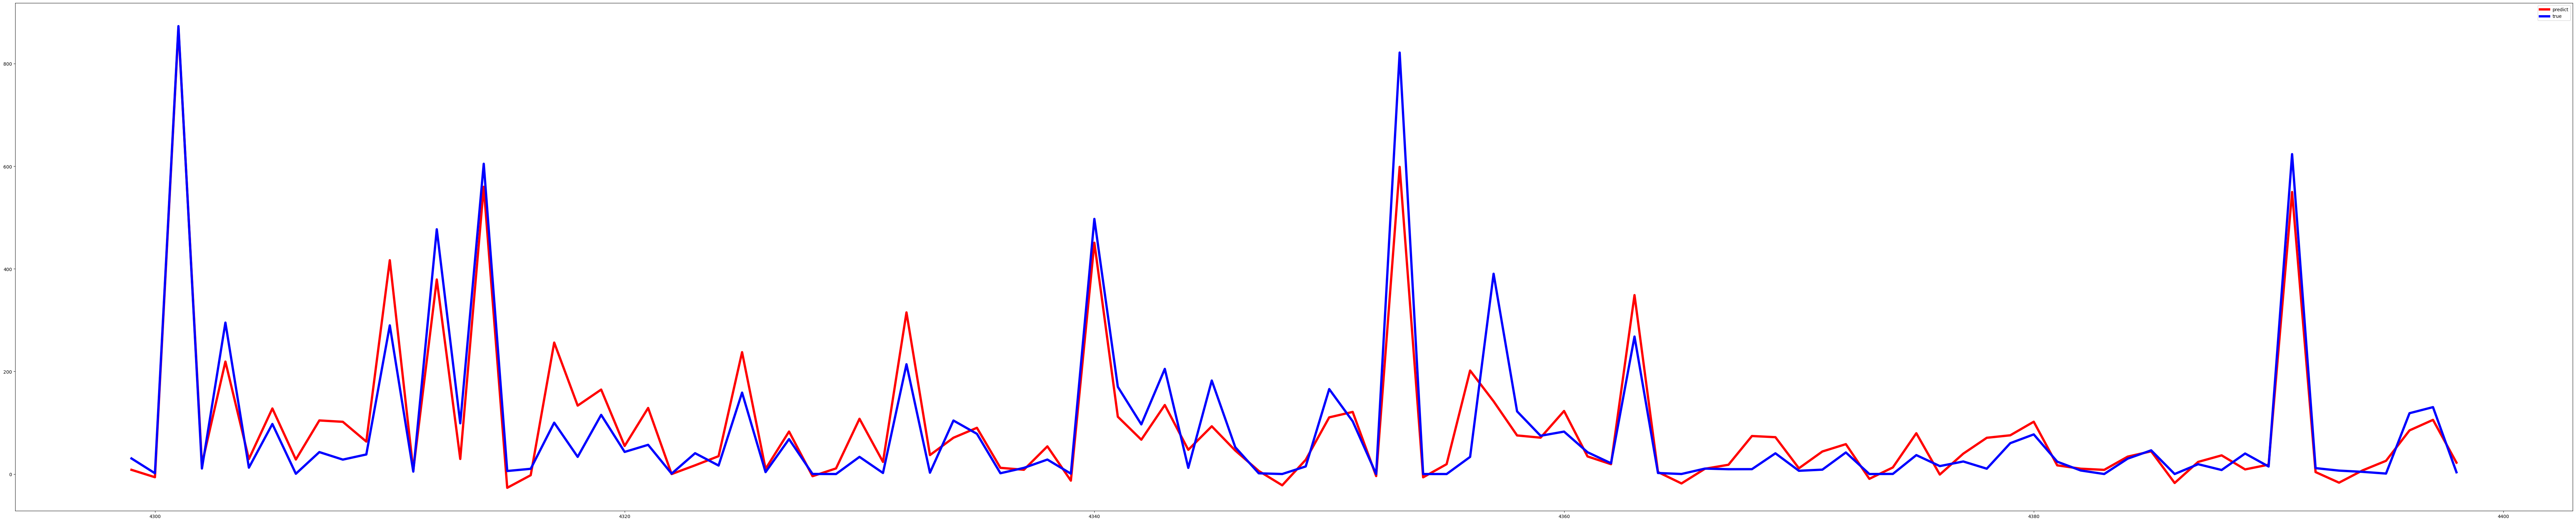

In [8]:
plt.figure(figsize=(100, 20))
plt.plot(df[int(0.8*len(df)):int(0.8*len(df)) + 100].index, pred_test_rr[:100], c='red', label='predict', linewidth=5)
plt.plot(df[int(0.8*len(df)):int(0.8*len(df)) + 100].index, y_test[:100], c='blue', label='true', linewidth=5)
plt.legend()
plt.show()

In [9]:
data_pred = {'revenue': y_test, ' revenue_predict' : pred_test_rr }
df_pred = pd.DataFrame(data_pred)
df_pred.head(100)

,revenue,revenue_predict
1708,30.400000,8.217345
4887,1.500000,-6.218987
4804,873.260194,869.345238
323,10.750000,19.088986
993,295.212467,219.209632
...,...,...
5093,4.267218,7.060780
3188,0.921000,25.791220
5111,118.587880,85.071002
2794,130.431368,105.622360
